In [95]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [54]:
data_train = pd.read_csv("train.csv")

In [55]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
data_train['Age'].fillna(data_train['Age'].mean(), inplace=True)

In [60]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

c:\Users\Kasheef_Alee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


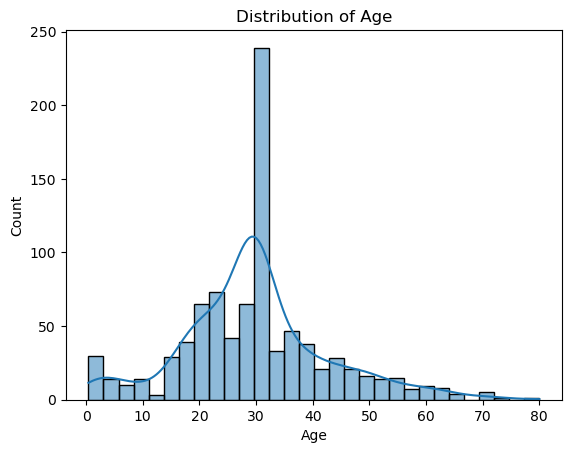

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of age
sns.histplot(data_train['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.show()

c:\Users\Kasheef_Alee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


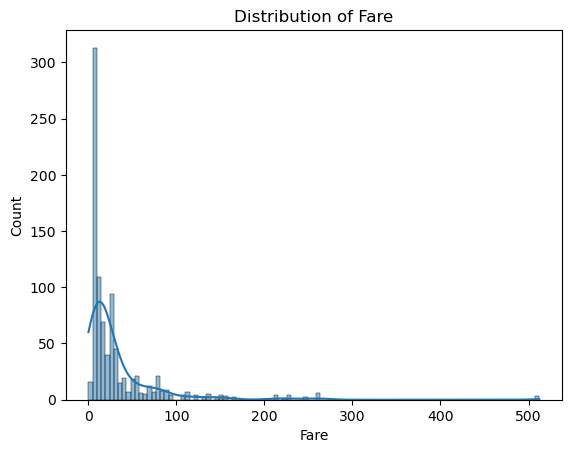

In [62]:
# Distribution of fare
sns.histplot(data_train['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()



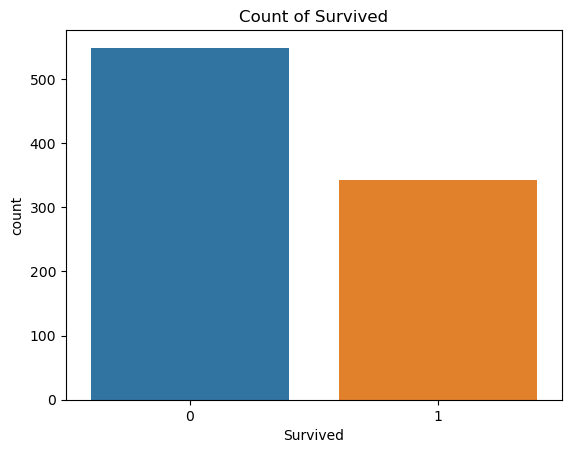

In [63]:
# Count plot of the Survived feature
sns.countplot(x='Survived', data=data_train)
plt.title('Count of Survived')
plt.show()


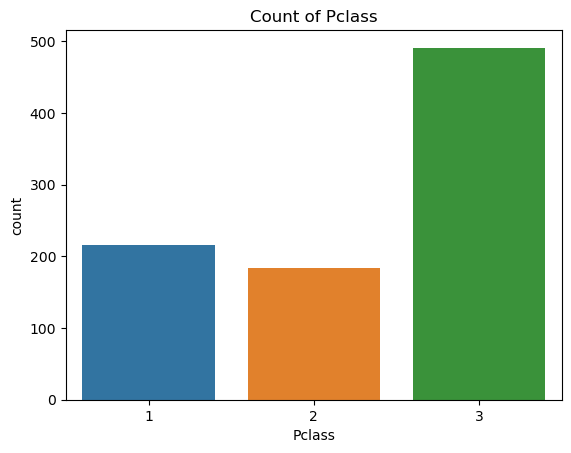

In [64]:

# Count plot of Pclass
sns.countplot(x='Pclass', data=data_train)
plt.title('Count of Pclass')
plt.show()


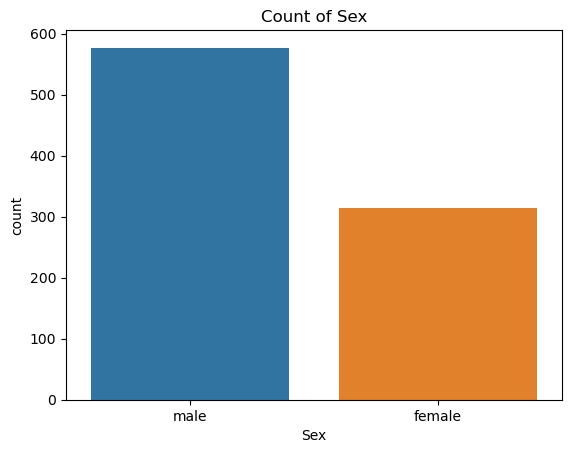

In [65]:

# Count plot of Sex
sns.countplot(x='Sex', data=data_train)
plt.title('Count of Sex')
plt.show()

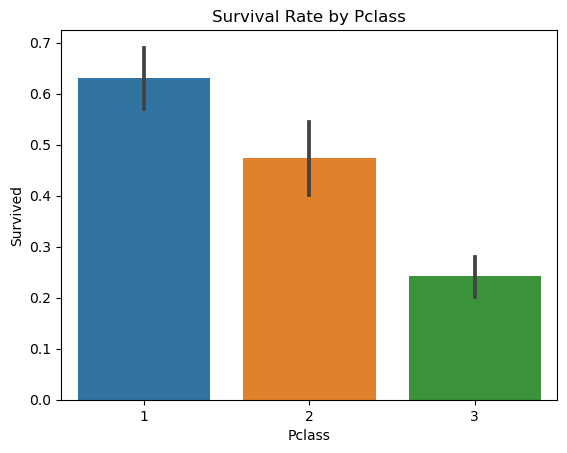

In [66]:
# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=data_train)
plt.title('Survival Rate by Pclass')
plt.show()




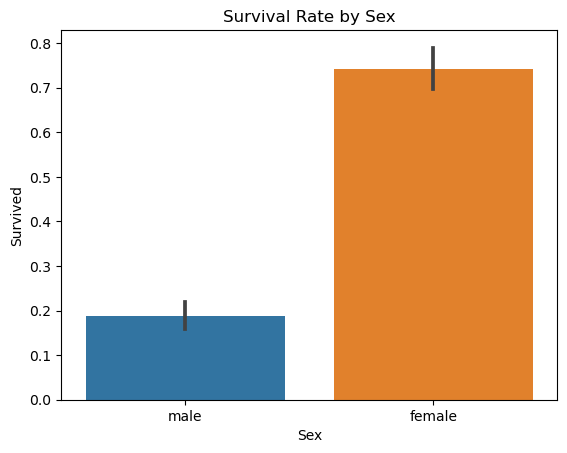

In [67]:
# Survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=data_train)
plt.title('Survival Rate by Sex')
plt.show()


c:\Users\Kasheef_Alee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Kasheef_Alee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


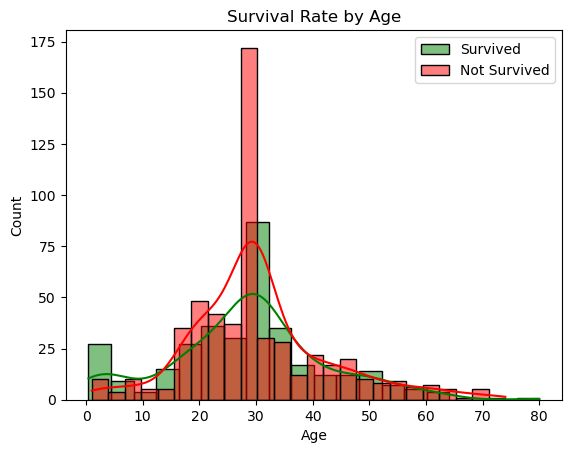

In [68]:

# Survival rate by Age
sns.histplot(data_train[data_train['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(data_train[data_train['Survived'] == 0]['Age'], kde=True, color='red', label='Not Survived')
plt.legend()
plt.title('Survival Rate by Age')
plt.show()

In [69]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
data_train['Embarked'].fillna(data_train['Embarked'].mode()[0], inplace=True)

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [72]:
data_train['Sex'] = data_train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [75]:
data_train['Embarked'] = data_train['Embarked'].map( {'S':0,'C':1,'Q':2}).astype(int)

In [76]:

# finding the number of people survived and not survived
survival_counts = data_train['Survived'].value_counts()
print(survival_counts)

Survived
0    549
1    342
Name: count, dtype: int64


In [84]:
X = data_train.drop(columns = ['PassengerId','Name','Ticket','Survived','Cabin'],axis=1)
Y = data_train['Survived']

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [86]:
model = LogisticRegression()

In [88]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

c:\Users\Kasheef_Alee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [91]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of Logistic Regression on training data : ', training_data_accuracy)

Accuracy score of Logistic Regression on training data :  0.8075842696629213


In [92]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [93]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of Logistic Regression on test data : ', test_data_accuracy)

Accuracy score of Logistic Regression on test data :  0.7821229050279329


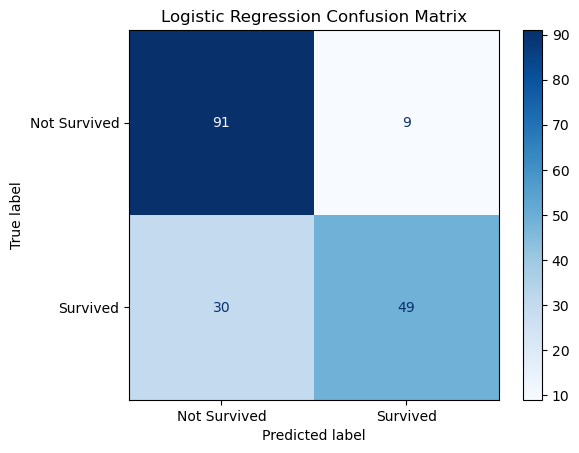

In [96]:
conf_matrix_lr = confusion_matrix(Y_test, X_test_prediction)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=['Not Survived', 'Survived'])

# Plotting the confusion matrix
disp_lr.plot(cmap=plt.cm.Blues)

# Adding the title
plt.title('Logistic Regression Confusion Matrix')

# Show the plot
plt.show()

In [97]:
# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=2)
decision_tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=2)

In [98]:
# Accuracy on training data
X_train_dt_prediction = decision_tree_model.predict(X_train)
training_data_accuracy_dt = accuracy_score(Y_train, X_train_dt_prediction)
print('Accuracy score of Decision Tree on training data : ', training_data_accuracy_dt)

Accuracy score of Decision Tree on training data :  0.9859550561797753


In [99]:
X_test_dt_prediction = decision_tree_model.predict(X_test)
test_data_accuracy_dt = accuracy_score(Y_test, X_test_dt_prediction)
print('Accuracy score of Decision Tree on test data : ', test_data_accuracy_dt)

Accuracy score of Decision Tree on test data :  0.776536312849162


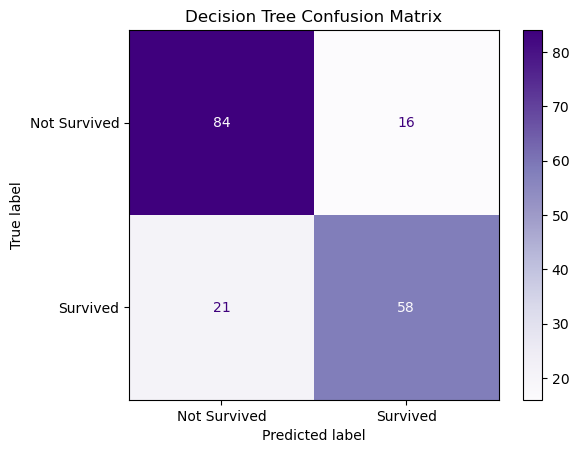

In [100]:
# Train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

# Make predictions
X_test_prediction_dt = decision_tree.predict(X_test)

# Compute confusion matrix
conf_matrix_dt = confusion_matrix(Y_test, X_test_prediction_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['Not Survived', 'Survived'])

# Plot confusion matrix 
disp_dt.plot(cmap=plt.cm.Purples)

# Add title
plt.title('Decision Tree Confusion Matrix')

# Show plot
plt.show()

In [101]:
# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=2)
random_forest_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [105]:
# Accuracy on training data
X_train_rf_prediction = random_forest_model.predict(X_train)
training_data_accuracy_rf = accuracy_score(Y_train, X_train_rf_prediction)
print('Accuracy score of Random Forest on training data : ', training_data_accuracy_rf)

Accuracy score of Random Forest on training data :  0.9859550561797753


In [108]:
# Accuracy on test data
X_test_rf_prediction = random_forest_model.predict(X_test)
test_data_accuracy_rf = accuracy_score(Y_test, X_test_rf_prediction)
print('Accuracy score of Random Forest on test data : ', test_data_accuracy_rf)

Accuracy score of Random Forest on test data :  0.7932960893854749


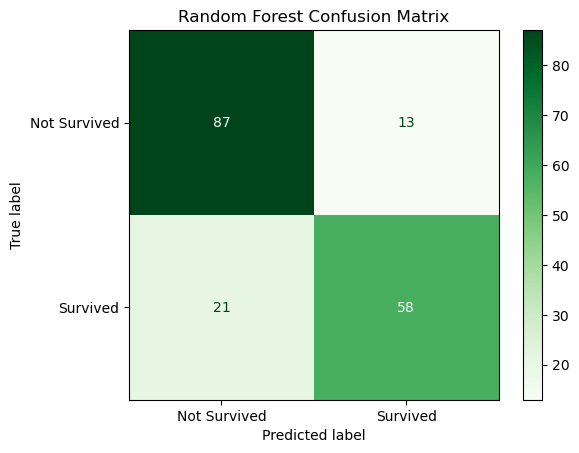

In [109]:
# Train the Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

# Make predictions
X_test_prediction_rf = random_forest.predict(X_test)

# Compute confusion matrix
conf_matrix_rf = confusion_matrix(Y_test, X_test_prediction_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=['Not Survived', 'Survived'])

# Plot confusion matrix 
disp_rf.plot(cmap=plt.cm.Greens)

# Add title
plt.title('Random Forest Confusion Matrix')

# Show plot
plt.show()

In [110]:
# Print Accuracy Scores for all models
print("\nModel Comparison:")
print(f"Logistic Regression Test Accuracy: {test_data_accuracy:.2f}")
print(f"Decision Tree Test Accuracy: {test_data_accuracy_dt:.2f}")
print(f"Random Forest Test Accuracy: {test_data_accuracy_rf:.2f}")


Model Comparison:
Logistic Regression Test Accuracy: 0.78
Decision Tree Test Accuracy: 0.78
Random Forest Test Accuracy: 0.79


c:\Users\Kasheef_Alee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


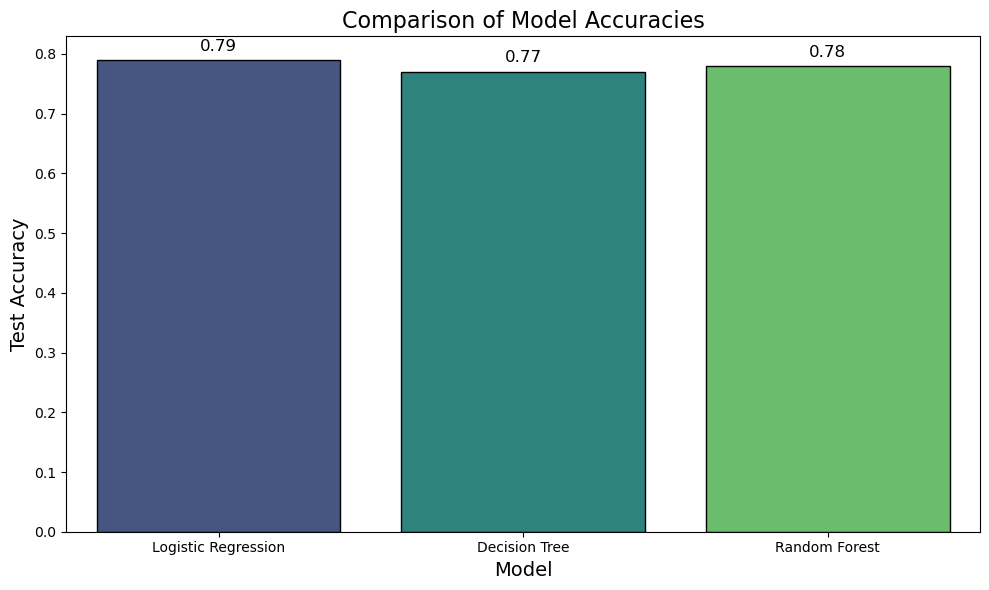

In [111]:
# Model names and their corresponding test accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.79, 0.77, 0.78]

# Creating the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=models, y=accuracies, palette='viridis', edgecolor='black')

# Adding title and labels
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()